<a href="https://colab.research.google.com/github/lishav123/MLS-track-notes-/blob/main/Unsupervised_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

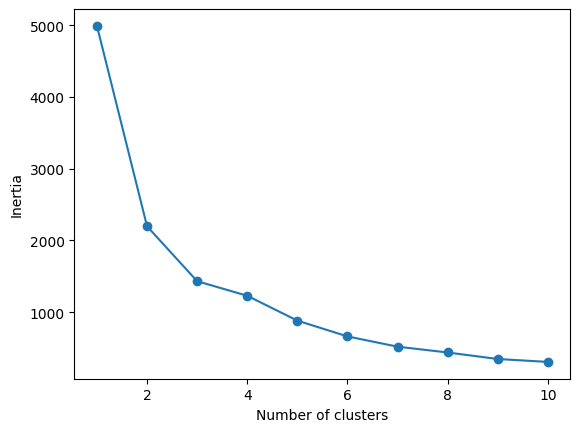

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

X = load_iris()['data']
X = np.stack([X[:, 0] * X[:, 1], X[:, 2] * X[:, 3]], axis=1)
y = load_iris()['target']

inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)

import pandas as pd
df = pd.DataFrame(X, columns=['sepal area (cm^2)', 'sepal area (cm^2)'])
df['cluster'] = y_pred
df['target'] = y

df

,sepal area (cm^2),sepal area (cm^2),cluster,target
0,17.85,0.28,0,0
1,14.70,0.28,0,0
2,15.04,0.26,0,0
3,14.26,0.30,0,0
4,18.00,0.28,0,0
...,...,...,...,...
145,20.10,11.96,1,2
146,15.75,9.50,2,2
147,19.50,10.40,1,2
148,21.08,12.42,1,2


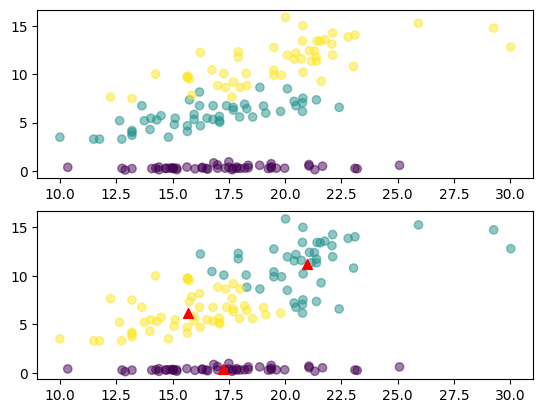

In [6]:
fig, ax = plt.subplots(2)

ax[0].scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
ax[1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='^', s=50, c='red')
plt.show()

In [7]:
model.cluster_centers_

array([[17.2578    ,  0.3656    ],
       [20.96065217, 11.21652174],
       [15.67314815,  6.2012963 ]])

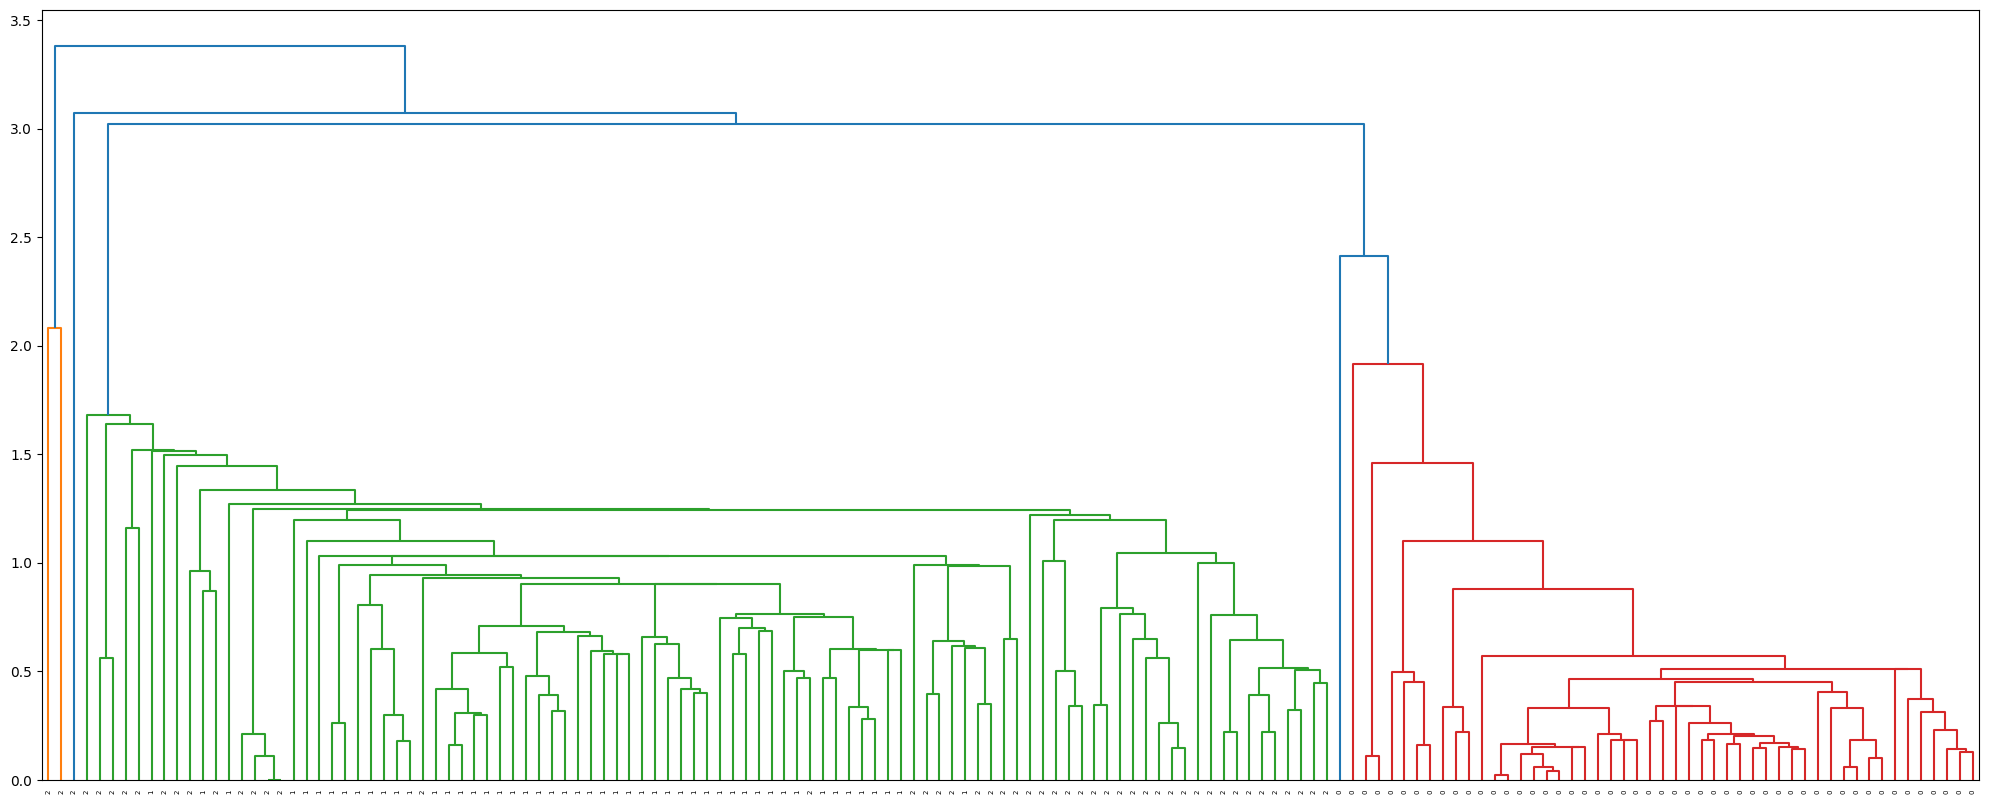

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=sorted(y))
plt.show()

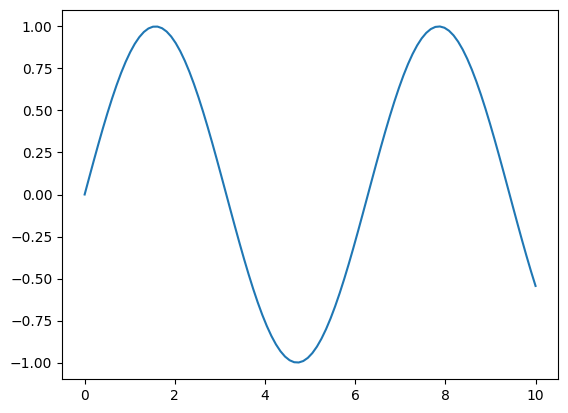

In [25]:
import numpy as np

plt.plot(np.linspace(0, 10, 100), np.sin(np.linspace(0, 10, 100)))
plt.show()

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

print("Shape of original data X:", X.shape)
print("Shape of PCA-transformed data X_pca:", X_pca.shape)

Shape of original data X: (150, 2)
Shape of PCA-transformed data X_pca: (150, 2)


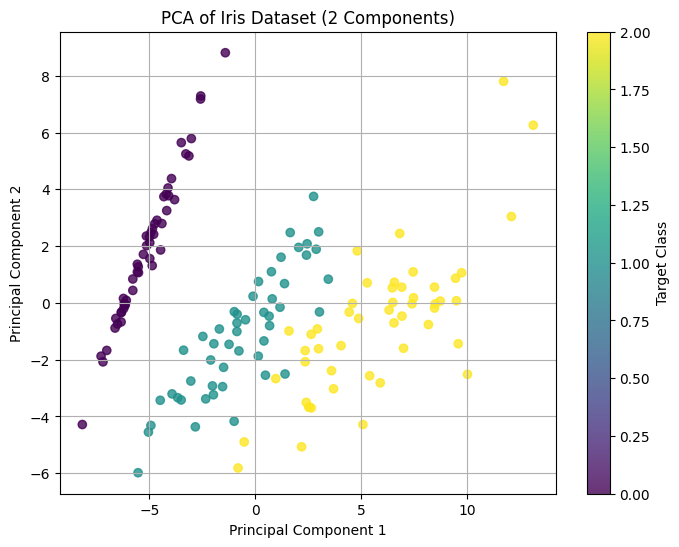

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

y = load_iris()['target']

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.show()